# **Geocoder API 2.0 레퍼런스**

# 1. 주소를 좌표로 변환

* 좌표를 주소로 변환하는 서비스를 제공합니다.
* 요청URL을 전송하면 지오코딩 서비스를 사용하실 수 있으며 일일 지오코딩 요청건수는 최대 30,000건 입니다.
* 단, API 요청은 실시간으로 사용하셔야 하며 별도의 저장장치나 데이터베이스에 저장할 수 없습니다.

* [참고]

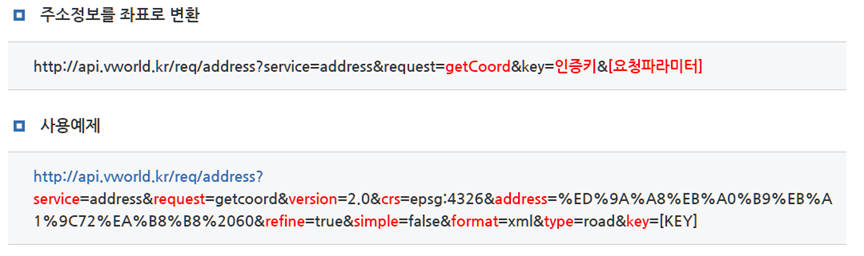

### (가) 좌표 기본틀 만들기

In [9]:
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key
address = '경기도 성남시 중원구 둔촌대로171번길 6'

url_point = 'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&\
address='+address+'&refine=true&simple=false&format=xml&type=road&key='+key

In [10]:
url_point

'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address=경기도 성남시 중원구 둔촌대로171번길 6&refine=true&simple=false&format=xml&type=road&key=63EB77B6-180C-3148-8B3A-5EA2A581299E'

### (나) 경도, 위도 좌표 구하기

In [11]:
import requests
from bs4 import BeautifulSoup

r = requests.get(url_point)
soup = BeautifulSoup(r.text,'html.parser')

In [13]:
# 경도 구하기
latitude = soup.find_all('x')
latitude

[<x><![CDATA[127.137716974]]></x>]

In [14]:
import re

p_x = re.compile('(\d+.\d+)')
m_x = p_x.search(str(latitude))
m_x.group()

'127.137716974'

In [15]:
# 위도 구하기
longitude = soup.find_all('y')
longitude

[<y><![CDATA[37.430963088]]></y>]

In [16]:
p_y = re.compile('(\d+.\d+)')
m_y = p_y.search(str(longitude))
m_y.group()

'37.430963088'

In [17]:
m_x.group()+','+m_y.group()

'127.137716974,37.430963088'

# 2. 좌표를 주소로 변환

* 좌표를 주소로 변환하는 서비스를 제공합니다.
* 요청URL을 전송하면 지오코딩 서비스를 사용하실 수 있으며 일일 지오코딩 요청건수는 최대 30,000건 입니다.
* 단, API 요청은 실시간으로 사용하셔야 하며 별도의 저장장치나 데이터베이스에 저장할 수 없습니다.
* [참고]
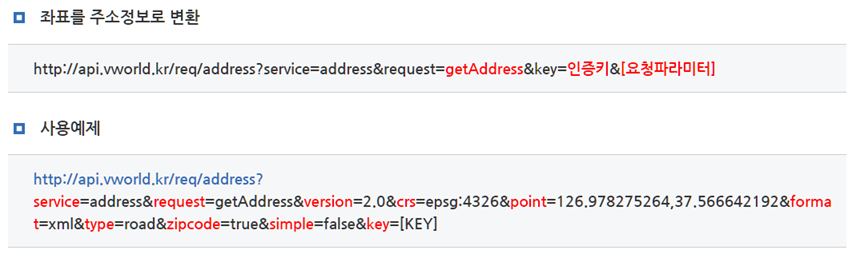

## (가) 주소 기본틀 만들기

In [19]:
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key
point = '127.137716974,37.430963088'

url_address = 'http://api.vworld.kr/req/address?service=address&request=getAddress&version=2.0&crs=epsg:4326&point='\
+point+'&format=xml&type=road&zipcode=true&simple=false&key='+key

In [20]:
url_address

'http://api.vworld.kr/req/address?service=address&request=getAddress&version=2.0&crs=epsg:4326&point=127.137716974,37.430963088&format=xml&type=road&zipcode=true&simple=false&key=63EB77B6-180C-3148-8B3A-5EA2A581299E'

## (나) 주소 구하기

In [21]:
r2 = requests.get(url_address)
soup2 = BeautifulSoup(r2.text,'html.parser')

In [22]:
#전체주소
address0 = soup2.find_all('text')
address0

[<text><![CDATA[경기도 성남시 중원구 둔촌대로171번길 6 (성남동,성남동 어울림)]]></text>]

In [23]:
# 광역시도
address1 = soup2.find_all('level1')
address1

[<level1><![CDATA[경기도]]></level1>]

In [24]:
# 시군구
address2 = soup2.find_all('level2')
address2

[<level2><![CDATA[성남시 중원구]]></level2>]

In [25]:
#행정동
address3 = soup2.find_all('level3')
address3

[<level3><![CDATA[성남동]]></level3>]

## (다) 주소 요소 추출하기

In [26]:
addres_f = str(address0).split('[')[3].split(']')[0]
addres_f

'경기도 성남시 중원구 둔촌대로171번길 6 (성남동,성남동 어울림)'

In [27]:
adress_1 = str(address1).split('[')[3].split(']')[0]
adress_1

'경기도'

In [28]:
adress_2 = str(address2).split('[')[3].split(']')[0]
adress_2

'성남시 중원구'

In [29]:
adress_3 = str(address3).split('[')[3].split(']')[0]
adress_3

'성남동'

# 3. 주소 -> 좌표 변환기

In [30]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [32]:
df = pd.read_excel('geocoding_test.xlsx')
df

,index,address
0,1,경기도 성남시 중원구 둔촌대로171번길 6 107동
1,2,경기도 성남시 분당구 삼평동 동판교로177번길 25


In [33]:
df['address'][0]

'경기도 성남시 중원구 둔촌대로171번길 6 107동'

In [34]:
len(df)

2

In [35]:
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key

point_list = [ ]
for i in range(len(df)) :
    
    url_point = 'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address='\
    +df['address'][i]+'&refine=true&simple=false&format=xml&type=road&key='+key

    r = requests.get(url_point)
    soup = BeautifulSoup(r.text,'html.parser')

    latitude = soup.find_all('x')
    p_x = re.compile('(\d+.\d+)')
    m_x = p_x.search(str(latitude))
    
    longitude = soup.find_all('y')
    p_y = re.compile('(\d+.\d+)')
    m_y = p_y.search(str(longitude))
    
    point = m_x.group()+','+m_y.group()
    point_list.append(point)

point_list

['127.137878308,37.430600308', '127.113568291,37.397321940']

## 함수로 만들어보자!

In [36]:
def get_point(data, API_key) :

    point_list = [ ]
    for i in range(len(data)) :
    
        url_point = 'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address='\
                    +data['address'][i]+'&refine=true&simple=false&format=xml&type=road&key='+API_key

        r = requests.get(url_point)
        soup = BeautifulSoup(r.text,'html.parser')

        latitude = soup.find_all('x')
        p_x = re.compile('(\d+.\d+)')
        m_x = p_x.search(str(latitude))
    
        longitude = soup.find_all('y')
        p_y = re.compile('(\d+.\d+)')
        m_y = p_y.search(str(longitude))
    
        point = m_x.group()+','+m_y.group()
        point_list.append(point)

    return point_list 

In [37]:
data = pd.read_excel('geocoding_test.xlsx')
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key

get_point(data, key)

['127.137878308,37.430600308', '127.113568291,37.397321940']

In [ ]:
data

,index,address
0,1,경기 용인시 기흥구 하갈동461
1,2,"경기도 성남시 분당구 동판교로177번길 252층 203호(삼평동,판교 호반 써밋 플..."
2,3,경상북도 울릉군 울릉읍 도동3길 26
3,4,부산광역시 남구 못골로 221층
4,5,경상북도 경주시 안강읍 화전남2길 49
5,6,충청북도 청주시 청원구 오창읍 오창대로 315104 (올리브상가)
6,7,경기도 용인시 처인구 백옥대로 11152층
7,8,경기도 양주시 옥정로6길 181층 107호
8,9,경남 함안군 칠원읍 구성리677-6 외2필지
9,10,제주특별자치도 제주시 중앙로8길 9(삼도이동)


## ConnectionError에 따른 객체 미생성 문제 해결 필요
- 주소 에러로 인한 미반환 에러 
- Try, Except 구문 활용 - 에러시는 error_list로 주소 반환

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_point_free_error(data, API_key) :

    row_num = 0
    point_list = [ ]
    error_list = [ ]

    for i in range(len(data)) :

        try :    
            row_num += 1
            url_point = 'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address='\
                    +data['address'][i]+'&refine=true&simple=false&format=xml&type=road&key='+API_key

            r = requests.get(url_point)
            soup = BeautifulSoup(r.text,'html.parser')

            latitude = soup.find_all('x')
            p_x = re.compile('(\d+.\d+)')
            m_x = p_x.search(str(latitude))
   
            longitude = soup.find_all('y')
            p_y = re.compile('(\d+.\d+)')
            m_y = p_y.search(str(longitude))
    
            point = m_x.group()+','+m_y.group()
            point_list.append(point)

        except : 
            error_list.append(data['address'][row_num]) 

    return point_list, error_list

In [ ]:
data = pd.read_excel('geo_test.xlsx')
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key

point_list, error_list = get_point_free_error(data, key)

In [ ]:
point_list

['130.905094444,37.484222691',
 '129.084440087,35.13651198',
 '129.213286048,35.990703875',
 '127.211740781,37.252446531',
 '127.092830771,37.822136292',
 '126.523762564,33.514661066']

## [최종] 주소, 좌표 한방에! -> DF으로!

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_error_free_point_address(data, API_key) :

    point_list = [ ]
    address_0_list = [ ]
    address_1_list = [ ]
    address_2_list = [ ]
    address_3_list = [ ]
    error_list = [ ]

    for i in range(len(data)) :

        try :    
            url_point = 'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address='+data['address'][i]+'&refine=true&simple=false&format=xml&type=road&key='+API_key

            r = requests.get(url_point)
            soup = BeautifulSoup(r.text,'html.parser')

            latitude = soup.find_all('x')
            p_x = re.compile('(\d+.\d+)')
            m_x = p_x.search(str(latitude))
   
            longitude = soup.find_all('y')
            p_y = re.compile('(\d+.\d+)')
            m_y = p_y.search(str(longitude))
    
            # 나중에 역 Geocoding용 위도+경도 값 구하기
            point = m_x.group()+','+m_y.group()
            point_list.append([i, point])
            
            # 전체 주소
            address0 = soup.find_all('text')
            address_0 = str(address0).split('[')[3].split(']')[0]
            address_0_list.append([i, address_0 ])
            
            # 광역시도
            address1 = soup.find_all('level1')
            address_1 = str(address1).split('[')[3].split(']')[0]
            address_1_list.append([i, address_1 ])
            
            # 시군구
            address2 = soup.find_all('level2')
            address_2 = str(address2).split('[')[3].split(']')[0]
            address_2_list.append([i, address_2 ])
            
            # 행정동
            address3 = soup.find_all('level3')
            address_3 = str(address3).split('[')[3].split(']')[0]
            address_3_list.append([i, address_3 ])
            
        except : 
            error_list.append([i, data['address'][i]]) 

    return point_list, address_0_list, address_1_list, address_2_list, address_3_list, error_list

In [ ]:
data = pd.read_excel('store_03.xlsx')
key = 'xxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxx' # Your Vworld API key

point_list, address_0_list, address_1_list, address_2_list, address_3_list, error_list = get_error_free_point_address(data, key)

In [ ]:
point_list[:5]

[[3, '127.403744668,36.32677868'],
 [4, '127.1424262,37.476408408'],
 [5, '127.044367171,37.49632057'],
 [6, '127.128433481,37.434196404'],
 [7, '128.085367082,35.192253621']]

In [ ]:
address_1_list[:5]

[[3, '대전광역시'], [4, '서울특별시'], [5, '서울특별시'], [6, '경기도'], [7, '경상남도']]

In [ ]:
address_2_list[:5]

[[3, '중구'], [4, '송파구'], [5, '강남구'], [6, '성남시 수정구'], [7, '진주시']]

In [ ]:
address_3_list[:5]

[[3, '오류동'], [4, '장지동'], [5, '역삼동'], [6, '수진동'], [7, '동성동']]

In [ ]:
error_list[:5]

[[0, '경기도 시흥시 도일로135번길 41402동508호'],
 [1, '부산 기장군 정관면 용수리495-7'],
 [2, '경북 영덕군 영덕읍남석리 71-2번지'],
 [12, '대전 서구 변동도산로 168, 1층'],
 [14, '경기도 안양시 만안구 만안로 35109호 (안양동,빌로채)']]

In [ ]:
dict1 = { 'point' : [ point_list[i][1] for i in range( len(point_list) ) ],
       'address0' : [ address_0_list[i][1] for i in range( len(address_0_list) ) ],
       'address1' : [ address_1_list[i][1] for i in range( len(address_1_list) ) ],
       'address2' : [ address_2_list[i][1] for i in range( len(address_2_list) ) ],
       'address3' : [ address_3_list[i][1] for i in range( len(address_3_list) ) ] }

In [ ]:
df1 = pd.DataFrame(dict1, index = [ point_list[i][0] +60000 for i in range( len(point_list) ) ])

In [ ]:
len(df1)

17557

In [ ]:
df1.to_csv('point_03.csv', encoding='cp949')

In [ ]:
dict2 = { 'error' : [ error_list[i][1] for i in range( len(error_list)) ] }

In [ ]:
df2 = pd.DataFrame(dict2, index = [ error_list[i][0] + 60000 for i in range( len(error_list)) ])

In [ ]:
df2.to_csv('error_03.csv', encoding='cp949')

In [ ]:
len(df2)

12443